#Correlation Analysis


In [1]:
import pandas as pd
videos = pd.read_csv('KRvideos_ANSI.csv', encoding='cp949')

In [2]:
videos.views

0          56227
1          72564
2          82500
3          16273
4          79566
          ...   
34562      30181
34563      81321
34564      70946
34565     433188
34566    1101410
Name: views, Length: 34567, dtype: int64

In [3]:
videos.head()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count
0,18.19.02,10,2011-09-29T13:08:39.000Z,56227,690,15,66
1,18.20.02,10,2011-09-29T13:08:39.000Z,72564,920,15,79
2,18.21.02,10,2011-09-29T13:08:39.000Z,82500,1029,14,88
3,17.14.11,22,2014-09-21T02:32:35.000Z,16273,0,1,1
4,17.22.12,22,2014-10-05T09:33:52.000Z,79566,1218,11,50


In [4]:
videos.publish_time

0        2011-09-29T13:08:39.000Z
1        2011-09-29T13:08:39.000Z
2        2011-09-29T13:08:39.000Z
3        2014-09-21T02:32:35.000Z
4        2014-10-05T09:33:52.000Z
                   ...           
34562    2018-06-13T16:16:08.000Z
34563    2018-06-13T17:00:01.000Z
34564    2018-06-13T17:14:26.000Z
34565    2018-06-13T19:10:31.000Z
34566    2018-06-13T19:29:43.000Z
Name: publish_time, Length: 34567, dtype: object

In [5]:
videos.publish_time = videos.publish_time.str[11:13]

In [6]:
videos.publish_time

0        13
1        13
2        13
3        02
4        09
         ..
34562    16
34563    17
34564    17
34565    19
34566    19
Name: publish_time, Length: 34567, dtype: object

In [7]:
videos.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.082367,-0.097976,-0.016725,-0.065038
views,-0.082367,1.000000,0.860043,0.581443,0.807600
likes,-0.097976,0.860043,1.000000,0.428036,0.922731
dislikes,-0.016725,0.581443,0.428036,1.000000,0.555549
comment_count,-0.065038,0.807600,0.922731,0.555549,1.000000


In [8]:
videos['publish_time'] = pd.to_numeric(videos['publish_time'])

In [9]:
videos

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count
0,18.19.02,10,13,56227,690,15,66
1,18.20.02,10,13,72564,920,15,79
2,18.21.02,10,13,82500,1029,14,88
3,17.14.11,22,2,16273,0,1,1
4,17.22.12,22,9,79566,1218,11,50
...,...,...,...,...,...,...,...
34562,18.14.06,25,16,30181,1870,91,39
34563,18.14.06,24,17,81321,321,17,61
34564,18.14.06,20,17,70946,3829,24,918
34565,18.14.06,25,19,433188,0,0,175


In [10]:
videos.corr()

,category_id,publish_time,views,likes,dislikes,comment_count
category_id,1.000000,0.035298,-0.082367,-0.097976,-0.016725,-0.065038
publish_time,0.035298,1.000000,0.013870,0.009301,0.013163,0.009584
views,-0.082367,0.013870,1.000000,0.860043,0.581443,0.807600
likes,-0.097976,0.009301,0.860043,1.000000,0.428036,0.922731
dislikes,-0.016725,0.013163,0.581443,0.428036,1.000000,0.555549
comment_count,-0.065038,0.009584,0.807600,0.922731,0.555549,1.000000


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [12]:
corr = videos.corr(method='pearson')
corr

,category_id,publish_time,views,likes,dislikes,comment_count
category_id,1.000000,0.035298,-0.082367,-0.097976,-0.016725,-0.065038
publish_time,0.035298,1.000000,0.013870,0.009301,0.013163,0.009584
views,-0.082367,0.013870,1.000000,0.860043,0.581443,0.807600
likes,-0.097976,0.009301,0.860043,1.000000,0.428036,0.922731
dislikes,-0.016725,0.013163,0.581443,0.428036,1.000000,0.555549
comment_count,-0.065038,0.009584,0.807600,0.922731,0.555549,1.000000


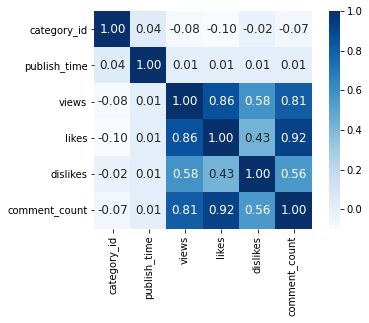

In [13]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 12}, fmt = '.2f', square = True, cmap = 'Blues')


# OLS Linear Regression

In [14]:
# 출처: https://bongury.tistory.com/88 [봉구리밥스]

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


result_1 = sm.ols(formula = 'views ~  +category_id + publish_time +likes+dislikes+comment_count',data=videos).fit()
result_1.summary()

# P>|t| (유의확률)에서 'category_id', 'publish_time'이 view와 유의미한 관계를 보이지 않음.  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 2.801e+04
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:54:57   Log-Likelihood:            -5.2931e+05
No. Observations:               34567   AIC:                         1.059e+06
Df Residuals:                   34561   BIC:                         1.059e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.954e+05   2.18e+04      8.975      0.000    1.53e+05    2.38e+05
category_id      24.3316    878.106      0.028      0.978   -1696.785    1745.448
publish_time   1453.6535   1061.577      1.369      0.171    -627.072    3534.379
likes            19.6940      0.134    146.652      0.000      19.431      19.957
dislikes         54.6204      0.529    103.229      0.000      53.583      55.658
comment_count   -26.9766      0.792    -34.054      0.000     -28.529     -25.424
==============================================================================
Omnibus:                    53065.353   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        218203806.679
Skew:                           8.840   Prob(JB):                         0.00
Kurtosis:                     391.828   Cond. No.                     4.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
result_2 = sm.ols(formula = 'views ~  +likes+dislikes+comment_count',data=videos).fit() 

In [16]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 4.668e+04
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:54:57   Log-Likelihood:            -5.2931e+05
No. Observations:               34567   AIC:                         1.059e+06
Df Residuals:                   34563   BIC:                         1.059e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.101e+05   5848.383     35.930      0.000    1.99e+05    2.22e+05
likes            19.6944      0.134    147.339      0.000      19.432      19.956
dislikes         54.6277      0.529    103.249      0.000      53.591      55.665
comment_count   -26.9779      0.791    -34.117      0.000     -28.528     -25.428
==============================================================================
Omnibus:                    53078.268   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        218184146.885
Skew:                           8.845   Prob(JB):                         0.00
Kurtosis:                     391.810   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# 회귀계수 출력
print('Parameters : ', result_2.params)
# R squared 출력
print('Rsquaured : ', result_2.rsquared)
# 회귀계수에 대한 P-value 출력
print('Pvalue :', result_2.pvalues)
# 모형의 적합값 출력
print('Predicted values', result_2.predict())


Parameters :  Intercept        210134.442076
likes                19.694353
dislikes             54.627716
comment_count       -26.977855
dtype: float64
Rsquaured :  0.8020497064440376
Pvalue : Intercept        1.342372e-277
likes             0.000000e+00
dislikes          0.000000e+00
comment_count    6.050232e-251
dtype: float64
Predicted values [222762.42271417 226941.411707   228790.66773488 ... 262089.51280348
 205413.31749312 174821.67957975]


**결과 선형식**
views = 210134+ 54.6dislikes + 19.7likes - 27comment_count


**--> model이 'views'변동성의 80.2%설명**
